### It is a type of regression where relationships between independent and dependent variables cannot be expressed efficiently in a straight line, (ie) a curve is the best fitting for all the data points
### It is a special type of multi-linear regression
### Challenge :- To find whether an employee having a level of 6.5 earns upward of 150k $

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
#We do not split the data into training and test as we have only 10 observations.

### Fitting linear regression model to the dataset

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Visualizing results of linear regression (Proving why it's not useful with this data)

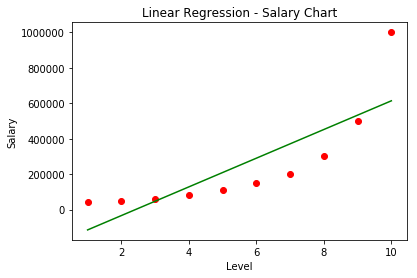

In [5]:
plt.scatter(X,y, color = 'red') #Actual values
plt.plot(X,lin_reg.predict(X), color='green')  #Predicted values
plt.title('Linear Regression - Salary Chart')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### As we can see linear regression is not suited for this data, it consists of a curve


###  Fitting Polynomial Regression to the dataset

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree  = 4) #Higher degree higher accuracy
X_poly = poly_reg.fit_transform(X) #Transforming regular indep. matrix X into polynomial one
poly_reg.fit(X_poly,y)
#Creating a linear regression model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Visualizing results of linear regression (Proving why it's useful with this data)

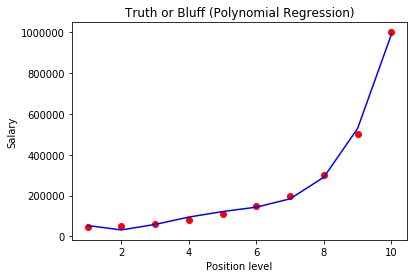

In [12]:
plt.scatter(X, y, color = 'red')
#We can't predict with matrix X as we need a matrix which is prepared for poly regression analysis.
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue') 
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Making the curve more smoother through :-X_grid = Matrix will consist of all values from 1-10 with a gap interval of 0.1 (eg:- 1.1,1.2..9.9) in all 90 observations , thus instead of our model predicting salary for only 10 observations (1-10) our model will now predict salary for 90 observations which will give much greater accuracy when poltting on chart

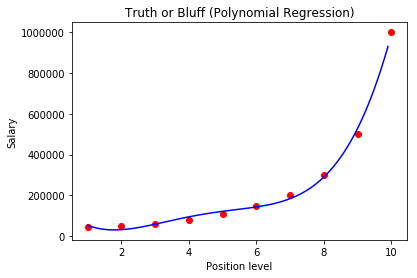

In [13]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1)) #X_grid consist of 90 observations
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [11]:
print(len(X_grid))

90


### Predicting salary through our Linear Regression model

In [6]:
n = float(input('Please enter employee level (1.0-10.0) '))
y = np.array(n)
y = y.reshape(-1,1)
y1_pred = lin_reg.predict(y)
y1_pred = float(y1_pred)
print()
print('The employee who has worked for {} no of years will get an approx salary of {} $'.format(n,round(y1_pred,3)))

Please enter employee level (1.0-10.0) 6.5

The employee who has worked for 6.5 no of years will get an approx salary of 330378.788 $


### As we can observe our linear_reg model is providing inaccurate results.

### Predicting salary through our Polynomial Regression model

In [15]:
n = float(input('Please enter employee level (1.0-10.0) '))
y = np.array(n)
y = y.reshape(-1,1)
y1_pred = lin_reg_2.predict(poly_reg.fit_transform(y))
y1_pred = float(y1_pred)
print()
print('The employee who has worked for {} no of years will get an approx salary of {} $'.format(n,round(y1_pred,3)))

Please enter employee level (1.0-10.0) 6.5

The employee who has worked for 6.5 no of years will get an approx salary of 158862.453 $


### Conclusion -  Hence we have proved that employee who is working at a level of 6.5 is earning upwards of 150k $ through our Polynomial Regression model